MOHAMMED IFTEKHAR
20-41980-1
SEC - B

#### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 3s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


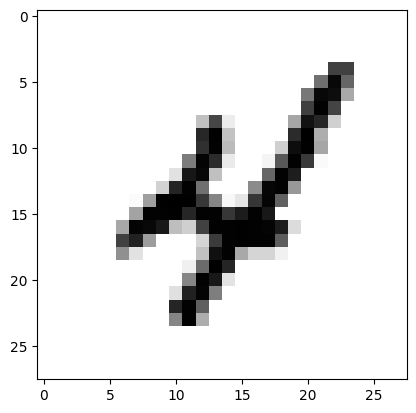

In [5]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

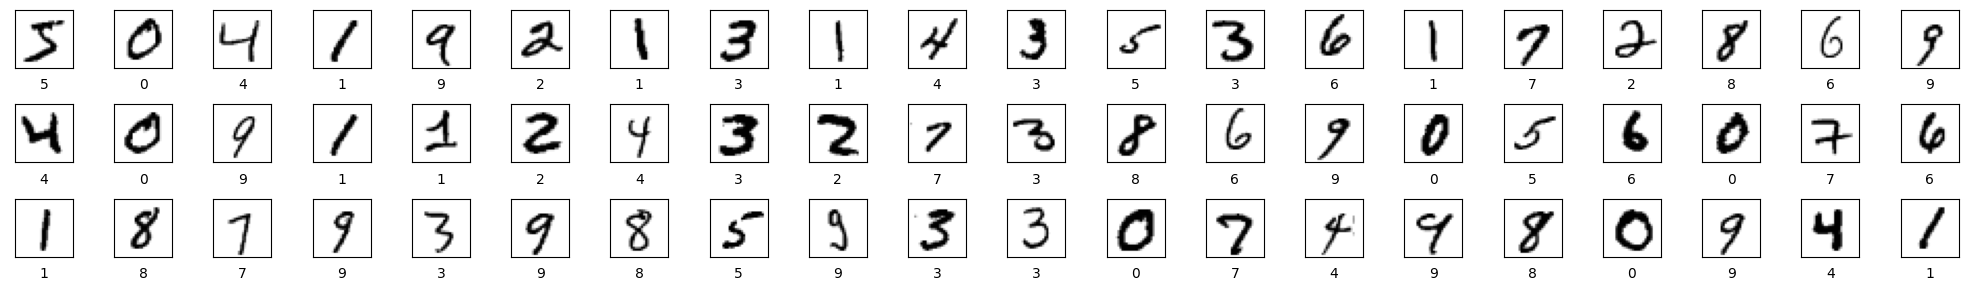

In [6]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Image (#9): Which is digit '4'


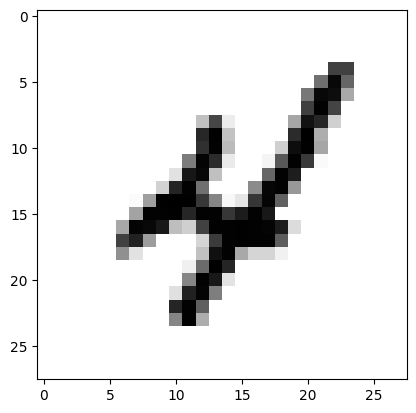

In [7]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [19]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
a = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 2s 4ms/step - loss: 27.2751 - accuracy: 0.2202 - val_loss: 27.3954 - val_accuracy: 0.1983
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2734 - accuracy: 0.1915 - val_loss: 27.3942 - val_accuracy: 0.1726
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2727 - accuracy: 0.1915 - val_loss: 27.3937 - val_accuracy: 0.1876
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2722 - accuracy: 0.1909 - val_loss: 27.3932 - val_accuracy: 0.1782
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 27.2533 - accuracy: 0.1725

Test accuracy: 0.17249999940395355


In [45]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [47]:
b = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2711 - accuracy: 0.1770 - val_loss: 27.3924 - val_accuracy: 0.1645
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2712 - accuracy: 0.1770 - val_loss: 27.3924 - val_accuracy: 0.1643
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2711 - accuracy: 0.1766 - val_loss: 27.3924 - val_accuracy: 0.1643
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2711 - accuracy: 0.1760 - val_loss: 27.3924 - val_accuracy: 0.1641
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 27.2533 - accuracy: 0.1702

Test accuracy: 0.17020000517368317


In [48]:
model.compile(
    optimizer='RMSProp',
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [50]:
c = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
657/657 [==============================] - 2s 4ms/step - loss: 27.2702 - accuracy: 0.1500 - val_loss: 27.3914 - val_accuracy: 0.1346
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2701 - accuracy: 0.1501 - val_loss: 27.3912 - val_accuracy: 0.1408
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 27.2699 - accuracy: 0.1482 - val_loss: 27.3911 - val_accuracy: 0.1482
Epoch 4/5
657/657 [==============================] - 3s 4ms/step - loss: 27.2698 - accuracy: 0.1510 - val_loss: 27.3910 - val_accuracy: 0.1477
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 27.2519 - accuracy: 0.1477

Test accuracy: 0.1476999968290329


#### ADAM

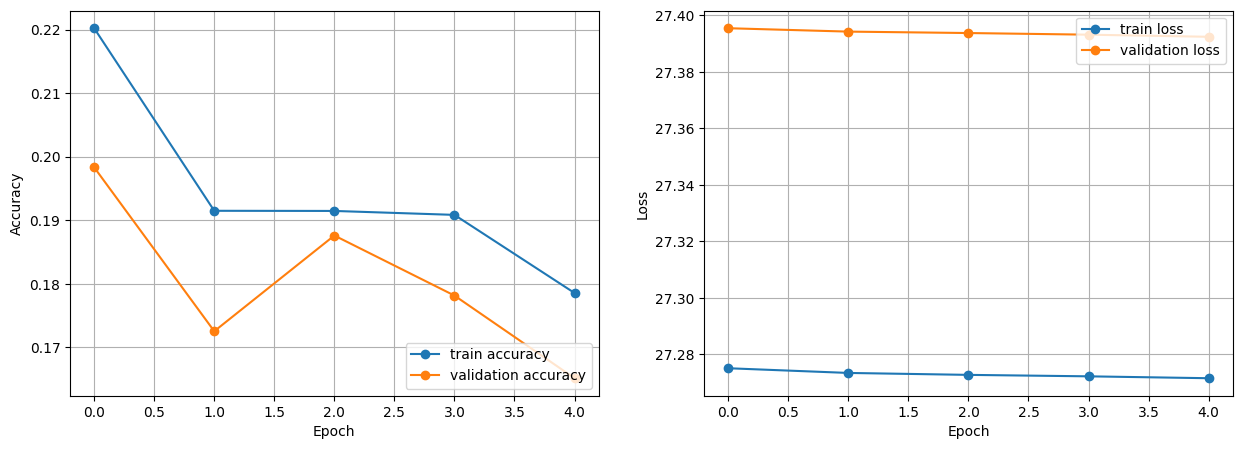

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(a.history['accuracy'], 'o-', label='train accuracy')
plt.plot(a.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(a.history['loss'], 'o-', label='train loss')
plt.plot(a.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#### SGD

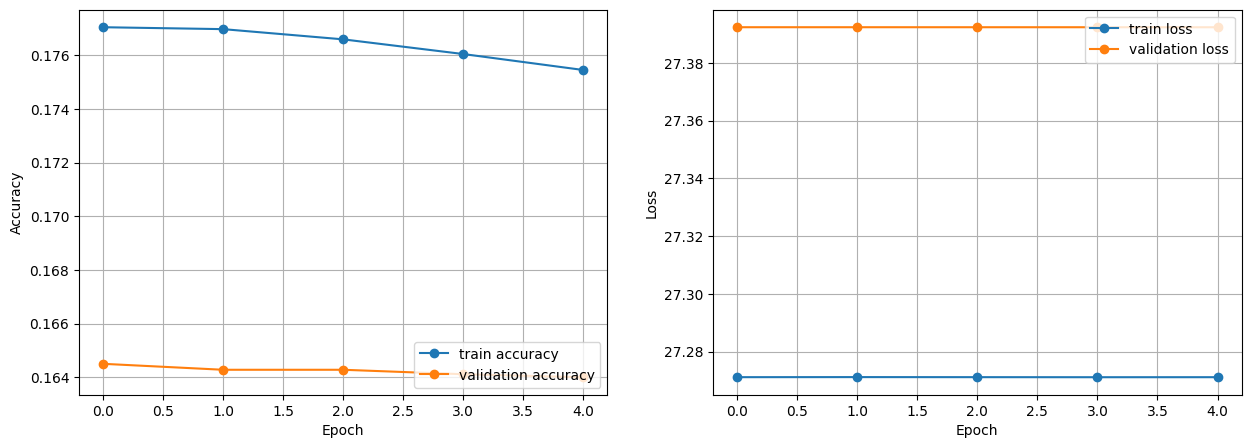

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(b.history['accuracy'], 'o-', label='train accuracy')
plt.plot(b.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(b.history['loss'], 'o-', label='train loss')
plt.plot(b.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#### RMSprop

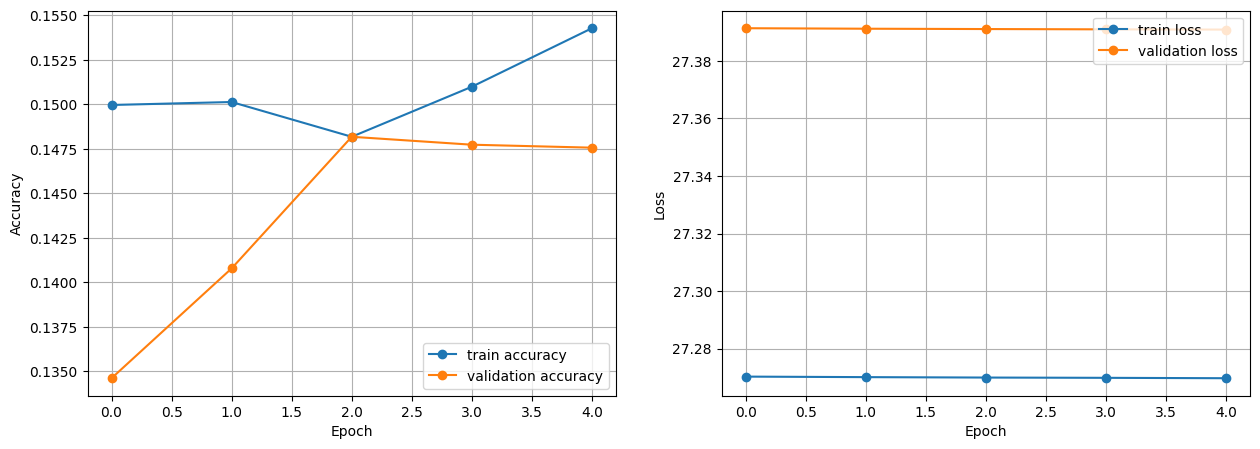

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(c.history['accuracy'], 'o-', label='train accuracy')
plt.plot(c.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(c.history['loss'], 'o-', label='train loss')
plt.plot(c.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Form the gathered results among ADAM, SGD and RMSprop, ADAM has the highest accuracy.